In [2]:
library(tidyverse)  # data manipulation

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(pheatmap)

In [4]:
library("factoextra")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [5]:
library("FactoMineR")

### reads distribution

In [6]:
star_n <- read.table('multiqc_star.txt',header=T)
star_t <- read.table('tumor_multiqc_star.txt',header=T)

In [7]:
qualimap_n <- read.table('qualimap_rnaseq_genome_results.txt',header=T)
qualimap_t <- read.table('tumor_qualimap_rnaseq_genome_results.txt',header=T)

In [8]:
temp1_n <- star_n[,c('Sample','total_reads','uniquely_mapped','uniquely_mapped_percent','multimapped',
                  'multimapped_percent','unmapped_other_percent','num_splices')]

In [9]:
temp1_t <- star_t[,c('Sample','total_reads','uniquely_mapped','uniquely_mapped_percent','multimapped',
                  'multimapped_percent','unmapped_other_percent','num_splices')]

In [10]:
temp2_n <- qualimap_n[,c('total_alignments','reads_aligned_genes','reads_aligned_exonic','reads_aligned_intronic',
         'reads_aligned_intergenic','reads_aligned_overlapping_exon'
        )]
temp2_t <- qualimap_t[,c('total_alignments','reads_aligned_genes','reads_aligned_exonic','reads_aligned_intronic',
         'reads_aligned_intergenic','reads_aligned_overlapping_exon'
        )]

In [11]:
all_data <- rbind(cbind(temp1_n,temp2_n),cbind(temp1_t,temp2_t))

In [12]:
openxlsx::write.xlsx( all_data,rowNames = FALSE, file = "all.qc.xlsx")

In [13]:
head(all_data)

,Sample,total_reads,uniquely_mapped,uniquely_mapped_percent,multimapped,multimapped_percent,unmapped_other_percent,num_splices,total_alignments,reads_aligned_genes,reads_aligned_exonic,reads_aligned_intronic,reads_aligned_intergenic,reads_aligned_overlapping_exon
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,H9DW0030N,61797574,52629907,85.17,8214690,13.29,0.28,46140847,164665497,64238526,64238526,8297530,4258568,2470067
2,H9DW0038N,60558953,56075011,92.60,2756207,4.55,0.22,59763646,129612963,88087848,88087848,14706437,4263827,3438387
3,H9DW0039N,60168211,55351429,91.99,2623723,4.36,0.34,59548363,127384244,85001574,85001574,13598178,6100461,3368365
4,H9DW0049N,58105703,51806600,89.16,5246470,9.03,0.32,48239759,142043877,64306576,64306576,17162879,7206607,3231500
5,H9DW0052N,52453781,49040966,93.49,2670899,5.09,0.10,40490834,114440985,60894424,60894424,14368555,6729442,3157896
6,H9DW0056N,53160651,47244460,88.87,4884240,9.19,0.30,52519185,130236278,66650334,66650334,11406405,4963370,2556405


In [14]:
all_data %>% filter(str_detect(Sample,'N')) -> Normal

In [15]:
all_data %>% filter(str_detect(Sample,'T')) -> Tumor

In [16]:
p_t = ggplot(data = Tumor,aes(x=Sample,y=(uniquely_mapped+multimapped)/1000000))+geom_bar(fill="#04859D",stat="identity")+
theme_bw()+theme(axis.text.x = element_text(angle = 45,hjust = 1))+xlab("")+geom_hline(yintercept = 30)+
ylab("Total mapped reads / Million")+theme(panel.grid.major = element_blank()) 

In [17]:
p_n = ggplot(data = Normal,aes(x=Sample,y=(uniquely_mapped+multimapped)/1000000))+geom_bar(fill="#04859D",stat="identity")+
theme_bw()+theme(axis.text.x = element_text(angle = 45,hjust = 1))+xlab("")+geom_hline(yintercept = 30)+
ylab("Total mapped reads / Million")+theme(panel.grid.major = element_blank()) 

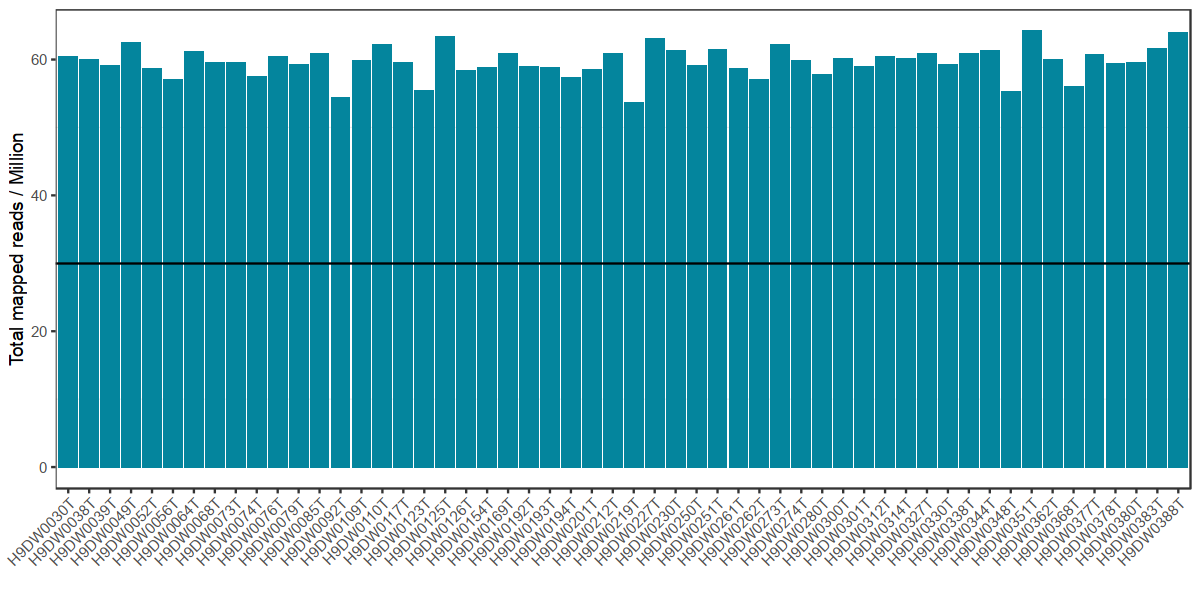

In [18]:
options(repr.plot.width=10,repr.plot.height=5)
p_t

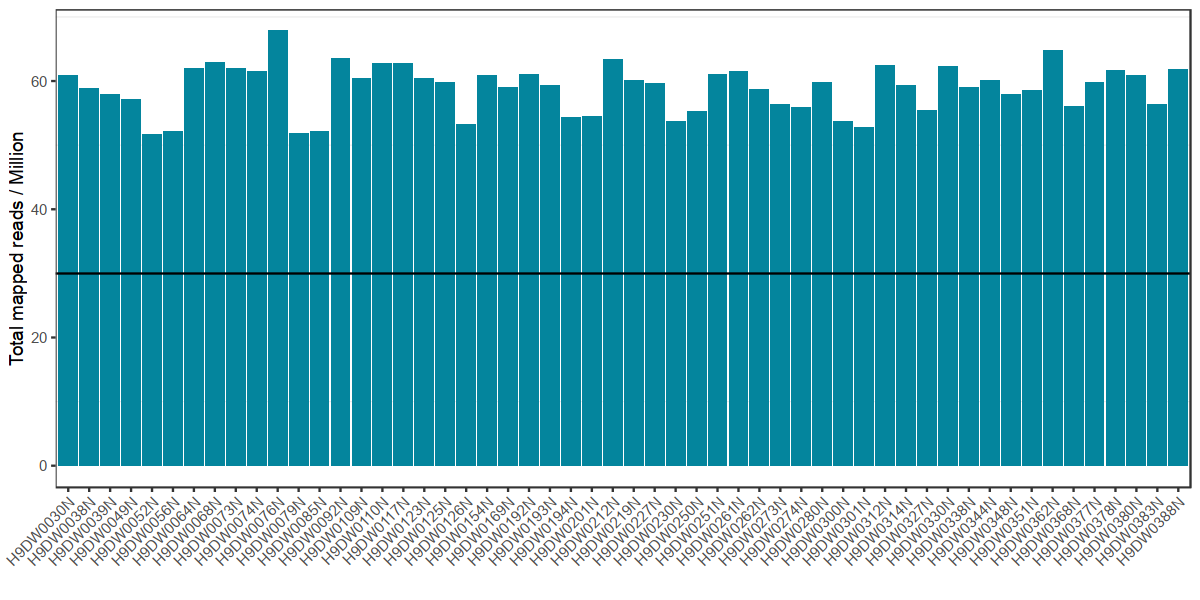

In [19]:
options(repr.plot.width=10,repr.plot.height=5)
p_n

In [21]:
ggsave(filename = "Tumor.Totalreads.barplot.pdf",plot = p_t,width = 10,height = 5)
ggsave(filename = "Normal.Totalreads.barplot.pdf",plot = p_n,width = 10,height = 5)

### correlation matrix

In [114]:
data_Tumor_tpm <- readRDS('../00.data/Tumor.tpm.Rdata')
data_Normal_tpm <- readRDS('../00.data/Normal.tpm.Rdata')

In [115]:
head(data_Tumor_tpm)

,9DW0030,9DW0038,9DW0039,9DW0049,9DW0052,9DW0056,9DW0064,9DW0068,9DW0073,9DW0074,⋯,9DW0344,9DW0348,9DW0351,9DW0362,9DW0368,9DW0377,9DW0378,9DW0380,9DW0383,9DW0388
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6.793832,2.339765,2.931239,12.105895,9.699353,4.508053,2.098166,1.045524,7.960385,1.815963,⋯,2.527701,0.839477,6.534398,2.029366,2.461694,4.510342,4.705178,3.159491,1.937165,2.709262
A1BG-AS1,2.229624,0.693577,0.767752,0.725219,3.026700,1.681083,1.806648,0.518241,4.562893,0.638787,⋯,1.336471,0.588684,1.386972,0.508167,0.562715,2.397408,1.719141,1.208936,0.813533,1.279563
A1CF,0.099166,0.000000,2.930860,7.725161,1.652509,3.330733,0.041193,3.914073,0.012446,0.168411,⋯,4.209980,0.000000,15.530977,0.000000,32.551016,0.035345,0.046124,0.934952,0.022244,0.904858
A2M,618.316979,282.864164,650.704958,27.339350,717.626515,270.008714,314.743489,243.104425,228.524684,138.544962,⋯,352.805683,430.454017,108.834804,786.610700,23.245277,549.354763,567.852384,179.334522,409.965012,431.952125
A2M-AS1,4.312236,3.340083,0.833381,0.115584,2.117325,0.872245,1.379249,0.238519,2.245094,0.342342,⋯,0.558941,6.087254,0.092414,4.584583,0.208061,1.175654,1.255308,0.406795,0.517140,1.345734
A2ML1,0.160812,0.025255,0.053246,0.022994,0.082605,0.042365,0.000000,0.000000,0.000000,0.127251,⋯,1.279669,0.304929,0.000000,0.052580,0.045692,0.054263,0.018082,0.444593,0.000000,0.009245


In [116]:
sampleid <- read.table('sample.id')

In [117]:
sampleid$tumor <- paste0('T',sampleid$V1 )
sampleid$normal <- paste0('N',sampleid$V1 )

In [118]:
saveRDS(object = sampleid,file = "sampleid.Rdata")

In [119]:
colnames(data_Tumor_tpm) %>% match(sampleid$V2) %>% sampleid[.,'tumor'] -> colnames(data_Tumor_tpm)

In [120]:
colnames(data_Normal_tpm) %>% match(sampleid$V2) %>% sampleid[.,'normal'] -> colnames(data_Normal_tpm)

In [27]:
tumor_cor_matrix <- cor(data_Tumor_tpm,method = "spearman")
normal_cor_matrix <- cor(data_Normal_tpm,method = "spearman")

In [28]:
#names <- c(colnames(data_Tumor_tpm) %>% paste0("T"),colnames(data_Normal_tpm) %>% paste0("N"))

In [29]:
names <- c(colnames(data_Tumor_tpm) ,colnames(data_Normal_tpm))

In [30]:
data_merge <- cbind(data_Tumor_tpm,data_Normal_tpm)

In [31]:
colnames(data_merge) <- names

In [32]:
data_merge_cor <- cor(data_merge,method = "spearman")

In [51]:
pheatmap(data_merge_cor,cluster_rows = TRUE,cluster_cols = TRUE,fontsize = 5,
         height = 10,width = 10,filename = "All.corr.heatmap.pdf")

In [52]:
pheatmap(tumor_cor_matrix,cluster_rows = TRUE,cluster_cols = TRUE,fontsize = 5,
          height = 6,width = 6,filename = "tumor.corr.heatmap.pdf")

In [53]:
pheatmap(normal_cor_matrix,cluster_rows = TRUE,cluster_cols = TRUE,fontsize = 5,
                   height = 6,width = 6,filename = "normal.corr.heatmap.pdf")

In [121]:
 phe <- readRDS("../00.data/phe_RNA54.Rdata")

In [122]:
rownames(sampleid) <- sampleid$V2

In [123]:
sampleid$V2 %>% intersect(phe$sample) %>% sampleid[.,] -> sampleid

In [124]:
rownames(sampleid) %>% phe[.,'group']  -> sampleid$group

In [125]:
rownames(sampleid) <- sampleid$normal

In [126]:
data_Tumor_tpm <- as.data.frame(t(data_Tumor_tpm))
data_Normal_tpm <- as.data.frame(t(data_Normal_tpm))

In [127]:
head(data_Tumor_tpm)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T117,6.793832,2.229624,0.099166,618.31698,4.312236,0.160812,0.484184,0.000000,31.094709,7.103174,⋯,6.205278,9.655064,2.771101,4.801634,19.545764,0.077214,13.936113,189.11016,14.190968,15.774462
T32,2.339765,0.693577,0.000000,282.86416,3.340083,0.025255,0.125440,0.077188,24.657587,0.039194,⋯,2.349520,1.821792,2.482175,3.575485,11.674415,0.045569,10.144974,181.54658,10.534730,10.788200
T35,2.931239,0.767752,2.930860,650.70496,0.833381,0.053246,0.138537,0.085252,33.678931,5.583489,⋯,10.837965,24.227706,3.213054,4.496323,20.741086,0.106352,7.872196,193.20948,8.327269,10.154103
T69,12.105895,0.725219,7.725161,27.33935,0.115584,0.022994,0.000000,0.000000,8.151674,0.133773,⋯,7.902533,48.645874,0.508005,2.506339,4.743817,0.497372,3.204096,44.41071,2.480594,3.773561
T48,9.699353,3.026700,1.652509,717.62652,2.117325,0.082605,0.176843,0.163521,34.176965,0.275474,⋯,8.201595,11.529929,2.717595,3.640371,18.174323,0.500621,7.551718,173.77556,8.596683,9.361126
T33,4.508053,1.681083,3.330733,270.00871,0.872245,0.042365,0.079260,0.195360,22.465832,0.148254,⋯,9.752241,25.623026,2.218568,4.422312,18.381473,0.298221,6.134209,170.06338,13.175633,8.924639


In [128]:
data_Tumor_tpm$group <- 'T'

In [129]:
data_Normal_tpm$group <- 'N'

In [86]:
#rownames(data_Tumor_tpm) %>% match(sampleid$tumor) %>% sampleid[.,'group'] -> data_Tumor_tpm$group

In [87]:
#rownames(data_Normal_tpm) %>% match(sampleid$normal) %>% sampleid[.,'group'] -> data_Normal_tpm$group

In [130]:
data_merge <- rbind(data_Tumor_tpm,data_Normal_tpm)

In [103]:
head(data_merge[,-22737])

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,⋯,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9DW0030,6.793832,2.229624,0.099166,618.31698,4.312236,0.160812,0.484184,0.000000,31.094709,7.103174,⋯,6.205278,9.655064,2.771101,4.801634,19.545764,0.077214,13.936113,189.11016,14.190968,15.774462
9DW0038,2.339765,0.693577,0.000000,282.86416,3.340083,0.025255,0.125440,0.077188,24.657587,0.039194,⋯,2.349520,1.821792,2.482175,3.575485,11.674415,0.045569,10.144974,181.54658,10.534730,10.788200
9DW0039,2.931239,0.767752,2.930860,650.70496,0.833381,0.053246,0.138537,0.085252,33.678931,5.583489,⋯,10.837965,24.227706,3.213054,4.496323,20.741086,0.106352,7.872196,193.20948,8.327269,10.154103
9DW0049,12.105895,0.725219,7.725161,27.33935,0.115584,0.022994,0.000000,0.000000,8.151674,0.133773,⋯,7.902533,48.645874,0.508005,2.506339,4.743817,0.497372,3.204096,44.41071,2.480594,3.773561
9DW0052,9.699353,3.026700,1.652509,717.62652,2.117325,0.082605,0.176843,0.163521,34.176965,0.275474,⋯,8.201595,11.529929,2.717595,3.640371,18.174323,0.500621,7.551718,173.77556,8.596683,9.361126
9DW0056,4.508053,1.681083,3.330733,270.00871,0.872245,0.042365,0.079260,0.195360,22.465832,0.148254,⋯,9.752241,25.623026,2.218568,4.422312,18.381473,0.298221,6.134209,170.06338,13.175633,8.924639


In [154]:
res.pca <- prcomp(data_merge[,-22737],  scale = TRUE)

In [189]:
res.pca2 = PCA(data_merge,quali.sup=22737)

In [169]:
#data_merge %>% rownames() -> names

In [174]:
#mygroup <- data_merge$group

In [175]:
#names(mygroup) <- names

In [212]:
options(repr.plot.width=10,repr.plot.height=8)
p <- fviz_pca_ind(res.pca2, pointsize = 5, pointshape = 21,repel=TRUE,
            habillage="group")+ scale_color_manual(values=c("#999999","#E69F00"))

In [213]:
ggsave(filename = "PCA.RNA.seq.pdf",plot = p,width = 10,height = 8)

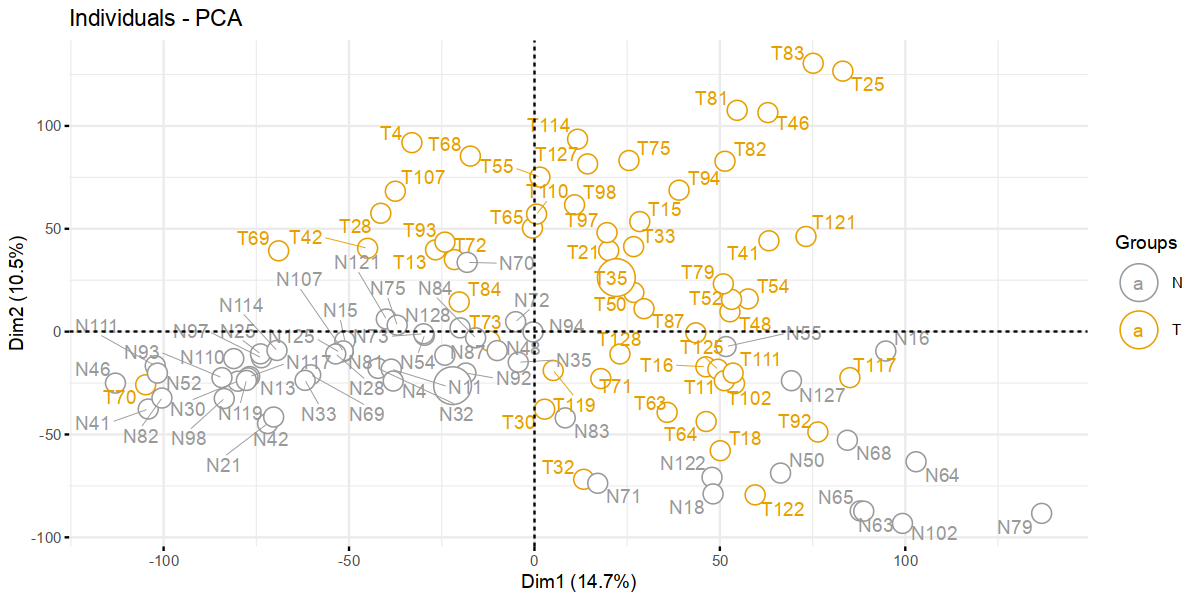

In [156]:
fviz_pca_ind(res.pca, pointsize = 5,  pointshape = 21,label="all", repel = TRUE,
             habillage=data_merge$group)+ scale_color_manual(values=c("#999999","#E69F00"))

In [182]:
?PCA